<h2> Module 2 - Preliminary Analysis </h2>

In this module, we will working with preliminary steps in an analytical project. More specifically, after loading data, we need to have some initial looks into what we have to determine potential problems that should be fixed in later phases. 

Typically, a project has the following steps:

1. **Form the project**. This means to establish the question to solve like what to model or to explain. Then, find or create a dataset that is able to address the analysis.
2. **Preliminary analysis**. In this step, we take an intial look into the data and determine any issues that may come with it. For examples, problematic data distributions, missing values, outliers, etc.
3. **Data processing**. In this step, we transform the data to address all the previously found issues. The data should be ready for modeling after this process.
4. **Modeling**. This step includes select the appropriate models for the data and the task, train and finetune the models if needed. Depending on the purpose of the project, one or a few models will be selected as finalists.
5. **Publish the results**. Any findings or well-trained models from the previous steps should be documented into a report, paper, product, etc.
6. Optional -- **maintain the product**, adapt it to new data, update the documentation, etc.

This module focus on step 2. In the next part, we will conduct preliminary analysis on a sample dataset.

<h3> Loading Data </h3>

The data we use is a student dataset which I created. The data consists of the following columns:

- StudentID
- FirstName
- LastName
- Major
- HighSchoolGPA
- AvgDailyStudyTime
- TotalAbsence (of the first semester)
- FamilyIncome
- State
- FirstYearGPA
- isGRA

The FirstYearGPA and isGRA columns are the targets in this data, however, we will work with them individually. The cells below perform

1. Mount the Google drive to access the data (assumed it is uploaded there already). Also change our working directory to the data folder so it is more convenient to load/save files later on.
2. Import pandas and alias it as <b>pd</b> 
3. Use the read_csv() function to load the dataset. The dataset is then stored in a variable named "students". 
  - As discussed in the previous module, objects we obtain from pandas.read_csv() are **dataframe**

After the loading/assignment, we can call the variable to look at its (summarized) contents. 


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
%cd /content/drive/MyDrive/IT7143\ Module\ 3

/content/drive/MyDrive/IT7143 Module 3


In [12]:
import pandas as pd

students = pd.read_csv('students.csv')
students

,StudentID,FirstName,LastName,Major,HighSchoolGPA,AvgDailyStudyTime,TotalAbsence,FamilyIncome,State,FirstYearGPA,isGRA
0,202305537,Eunice,Ehmann,Computer Science,2.47,5.11,22,57390,WA,2.42,0
1,202308560,Hobert,Schoenberger,Computer Science,2.27,4.20,28,189921,GA,2.05,0
2,202304948,Nicholas,Sizer,Information Technology,4.00,9.40,16,28752,GA,3.96,1
3,202301207,Elvin,Foulks,Information Technology,3.16,6.27,23,28480,GA,2.64,0
4,202300260,Bruno,Viney,Information Technology,3.82,12.35,17,123346,GA,3.99,1
...,...,...,...,...,...,...,...,...,...,...,...
195,202300691,Judge,Grandinetti,Computer Science,3.44,9.43,14,39338,TN,3.35,1
196,202309695,Winston,Kaneko,Software Engineering,2.94,2.26,6,52086,AL,2.41,0
197,202308725,Thaddeus,Chen,Data Science,3.59,9.33,11,338832,GA,3.50,1
198,202301120,Wright,Marburger,Computer Science,2.41,4.54,16,16429,FL,2.11,0


<h3> First Look into the Raw Data</h3>

Some first information to look at is the data type of each column in the loaded dataframe. We can access this using **info()** which is called from the dataframe variable. You should always verify that numerical columns are read in as either float or int. Only class columns should be object. 
- If a numerical column is having object type, it may consists of text values in the datafile, in which case we should examine more closely to resolve the issue. 

Another important information is **Non-Null Count**, or non-missing count. Missing values are problematic in analysis and need to be addressed. We will discuss more on missing value in the next module.

In [13]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          200 non-null    int64  
 1   FirstName          200 non-null    object 
 2   LastName           200 non-null    object 
 3   Major              200 non-null    object 
 4   HighSchoolGPA      200 non-null    float64
 5   AvgDailyStudyTime  200 non-null    float64
 6   TotalAbsence       200 non-null    int64  
 7   FamilyIncome       200 non-null    int64  
 8   State              200 non-null    object 
 9   FirstYearGPA       200 non-null    float64
 10  isGRA              200 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 17.3+ KB


we can use the head() method to look at several first rows in a dataframe

In [14]:
students.head()

,StudentID,FirstName,LastName,Major,HighSchoolGPA,AvgDailyStudyTime,TotalAbsence,FamilyIncome,State,FirstYearGPA,isGRA
0,202305537,Eunice,Ehmann,Computer Science,2.47,5.11,22,57390,WA,2.42,0
1,202308560,Hobert,Schoenberger,Computer Science,2.27,4.20,28,189921,GA,2.05,0
2,202304948,Nicholas,Sizer,Information Technology,4.00,9.40,16,28752,GA,3.96,1
3,202301207,Elvin,Foulks,Information Technology,3.16,6.27,23,28480,GA,2.64,0
4,202300260,Bruno,Viney,Information Technology,3.82,12.35,17,123346,GA,3.99,1


<h3> Examining Subsets of Data </h3>

Looking at the whole dataset is probably not too meaningful, especially as data can get to hundreds of thousands of rows and thousands of columns. We may start looking into more specific parts of the data. Extracting certain parts of a dataframe is called **slicing**.

To look at individual column, we add a pair of brackets with the column's name inside and in quotes (both single and double work)

In [15]:
students['HighSchoolGPA']

0      2.47
1      2.27
2      4.00
3      3.16
4      3.82
       ... 
195    3.44
196    2.94
197    3.59
198    2.41
199    3.19
Name: HighSchoolGPA, Length: 200, dtype: float64

The object we get from the above slicing is called a **series**. To obtain a dataframe instead, put the column's name in double brackets 

In [16]:
students[['Major']]

,Major
0,Computer Science
1,Computer Science
2,Information Technology
3,Information Technology
4,Information Technology
...,...
195,Computer Science
196,Software Engineering
197,Data Science
198,Computer Science


we can select multiple columns by including them separated by "**,**"



In [17]:
students[['Major','HighSchoolGPA','TotalAbsence']]

,Major,HighSchoolGPA,TotalAbsence
0,Computer Science,2.47,22
1,Computer Science,2.27,28
2,Information Technology,4.00,16
3,Information Technology,3.16,23
4,Information Technology,3.82,17
...,...,...,...
195,Computer Science,3.44,14
196,Software Engineering,2.94,6
197,Data Science,3.59,11
198,Computer Science,2.41,16


We can slice both rows and columns. For this purpose, we use DataFrame.loc. You need to provide two slicing conditions, one for row slicing and one for column slicing: 

<b>DataFrame.loc[{row condition} , {column condition}]</b>

In the cell below, the row condition is that their indexes are 10, 60, 110, and 200. The columns condition is that they are either Major, HighSchoolGPA, or TotalAbsence

In [18]:
students.loc[[10,60,110],['Major','HighSchoolGPA','TotalAbsence']]

,Major,HighSchoolGPA,TotalAbsence
10,Software Engineering,2.58,21
60,Computer Science,2.64,18
110,Data Science,3.14,16


More useful, we can slice a dataframe using conditions. In the cell below, the row condition is that any rows with FirstYearGPA over 3.0, and the "**:**" means to get all columns in the slice

In [19]:
students.loc[students['FirstYearGPA']>=3.0,:]

,StudentID,FirstName,LastName,Major,HighSchoolGPA,AvgDailyStudyTime,TotalAbsence,FamilyIncome,State,FirstYearGPA,isGRA
2,202304948,Nicholas,Sizer,Information Technology,4.00,9.40,16,28752,GA,3.96,1
4,202300260,Bruno,Viney,Information Technology,3.82,12.35,17,123346,GA,3.99,1
5,202303083,Alan,Borg,Computer Science,3.10,9.53,13,29282,TN,3.38,1
8,202309807,Courtney,Renfrow,Software Engineering,3.33,9.36,18,49382,GA,3.41,1
15,202307209,Wilburn,Palacio,Computer Science,3.15,6.61,16,223334,TN,3.01,0
23,202305164,Vernie,Teneyck,Software Engineering,2.91,9.66,12,266799,GA,3.41,1
26,202302607,Ezra,Casteel,Data Science,3.45,9.79,14,52386,GA,3.58,1
28,202308770,Julious,Barnette,Software Engineering,2.91,10.11,9,48439,AL,3.56,1
32,202306833,Armand,Trigo,Data Science,3.43,8.95,6,133691,GA,3.42,1
34,202306921,Clarence,Andress,Software Engineering,3.60,10.01,20,96589,GA,3.41,1


In the cell below, the row condition is that any rows with Major being Information Technology (note the use of "==" instead of "=")

In [20]:
students.loc[students['Major']=='Information Technology',:]

,StudentID,FirstName,LastName,Major,HighSchoolGPA,AvgDailyStudyTime,TotalAbsence,FamilyIncome,State,FirstYearGPA,isGRA
2,202304948,Nicholas,Sizer,Information Technology,4.00,9.40,16,28752,GA,3.96,1
3,202301207,Elvin,Foulks,Information Technology,3.16,6.27,23,28480,GA,2.64,0
4,202300260,Bruno,Viney,Information Technology,3.82,12.35,17,123346,GA,3.99,1
6,202307376,Agnes,Hampson,Information Technology,2.76,1.27,23,167265,FL,1.90,0
12,202304527,Webb,Pincus,Information Technology,2.25,5.88,21,62213,FL,2.75,0
19,202303080,Eben,Mizelle,Information Technology,2.59,2.52,17,53637,GA,1.90,0
38,202302695,Bee,Thein,Information Technology,3.47,6.24,12,57222,GA,2.94,0
49,202301447,Perry,Jahn,Information Technology,3.31,7.05,5,268937,AL,3.39,1
52,202300556,Juan,Pineda,Information Technology,2.59,6.46,18,29583,GA,3.09,1
58,202301528,Louis,Rollings,Information Technology,2.43,1.72,9,39046,GA,2.35,0


we can combine conditions, <b>'&'</b> for <b>and</b>, and <b>'|'</b> for <b>or</b>. Remember to wrap each condition in parentheses <b>()</b>. The cell below selects IT students with FirstYearGPA over 3.0

In [21]:
students.loc[(students['Major']=='Information Technology') & (students['FirstYearGPA']>=3.0),:]

,StudentID,FirstName,LastName,Major,HighSchoolGPA,AvgDailyStudyTime,TotalAbsence,FamilyIncome,State,FirstYearGPA,isGRA
2,202304948,Nicholas,Sizer,Information Technology,4.00,9.40,16,28752,GA,3.96,1
4,202300260,Bruno,Viney,Information Technology,3.82,12.35,17,123346,GA,3.99,1
49,202301447,Perry,Jahn,Information Technology,3.31,7.05,5,268937,AL,3.39,1
52,202300556,Juan,Pineda,Information Technology,2.59,6.46,18,29583,GA,3.09,1
67,202307373,Steve,Rumsey,Information Technology,3.54,8.31,15,180459,GA,3.72,1
71,202309176,Chas,Villasenor,Information Technology,2.89,8.24,11,77187,GA,3.15,1
74,202304405,Jesus,Mohammed,Information Technology,2.65,8.38,14,51406,WA,3.27,0
94,202309672,Silas,Dobos,Information Technology,4.00,6.12,21,41243,GA,3.11,1
101,202303610,Austin,Goertzen,Information Technology,3.83,7.57,11,86629,GA,3.59,1
105,202301449,Connie,Osier,Information Technology,3.10,6.12,11,50234,TN,3.14,1


Beside viewing, we can always store the new DataFrame in a new variable. Remember that slicing is view-only unless you store them somewhere. 

In [22]:
students_it_gpa3 =students.loc[(students['Major']=='Information Technology') & (students['FirstYearGPA']>=3.0),:]
students_it_gpa3

,StudentID,FirstName,LastName,Major,HighSchoolGPA,AvgDailyStudyTime,TotalAbsence,FamilyIncome,State,FirstYearGPA,isGRA
2,202304948,Nicholas,Sizer,Information Technology,4.00,9.40,16,28752,GA,3.96,1
4,202300260,Bruno,Viney,Information Technology,3.82,12.35,17,123346,GA,3.99,1
49,202301447,Perry,Jahn,Information Technology,3.31,7.05,5,268937,AL,3.39,1
52,202300556,Juan,Pineda,Information Technology,2.59,6.46,18,29583,GA,3.09,1
67,202307373,Steve,Rumsey,Information Technology,3.54,8.31,15,180459,GA,3.72,1
71,202309176,Chas,Villasenor,Information Technology,2.89,8.24,11,77187,GA,3.15,1
74,202304405,Jesus,Mohammed,Information Technology,2.65,8.38,14,51406,WA,3.27,0
94,202309672,Silas,Dobos,Information Technology,4.00,6.12,21,41243,GA,3.11,1
101,202303610,Austin,Goertzen,Information Technology,3.83,7.57,11,86629,GA,3.59,1
105,202301449,Connie,Osier,Information Technology,3.10,6.12,11,50234,TN,3.14,1


DataFrame.loc is usable only when the dataframe has columns' names (headers). In the case we want to (or need to) use column indexes, we can use DataFrame.iloc. Please do your self-research on this.

<h3>Distribution Analysis</h3>

Looking into the raw data only has some meaning initially. For deeper investigation, we need to examine the data distributions. In brief, distributions refer to how the data "looks like", i.e., how values in each column distributed.

The first tool for this is **Histogram**.

<h4>Histograms</h4>

Histograms are commonly used to illustrate the shape of a numeric variable's distribution. The figure has the following components
- Horizontal axis shows the range of values in the column
- Vertical bars represent values in the column binned into groups
- Vertical axis shows the frequency of each value bin

To draw histogram of single columns, we can use hist() from matplotlib.pyplot

We first import the pyplot module and give it an alias. Then, we call plt.hist() with the column of interests being the input. The show() function displays the figure.

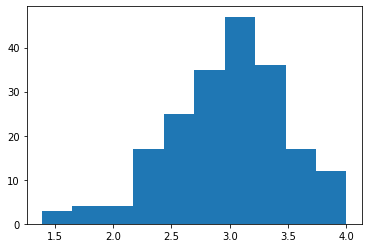

In [23]:
import matplotlib.pyplot as plt

plt.hist(students['HighSchoolGPA'])
plt.show()


To plot histograms for all numeric columns in a DataFrame we can use hist(). The bins= argument set the number of bins (bars) we want in the histogram. Smaller bins provide more details but may make the distribution look jagged, while too big bins make the distribution less details.

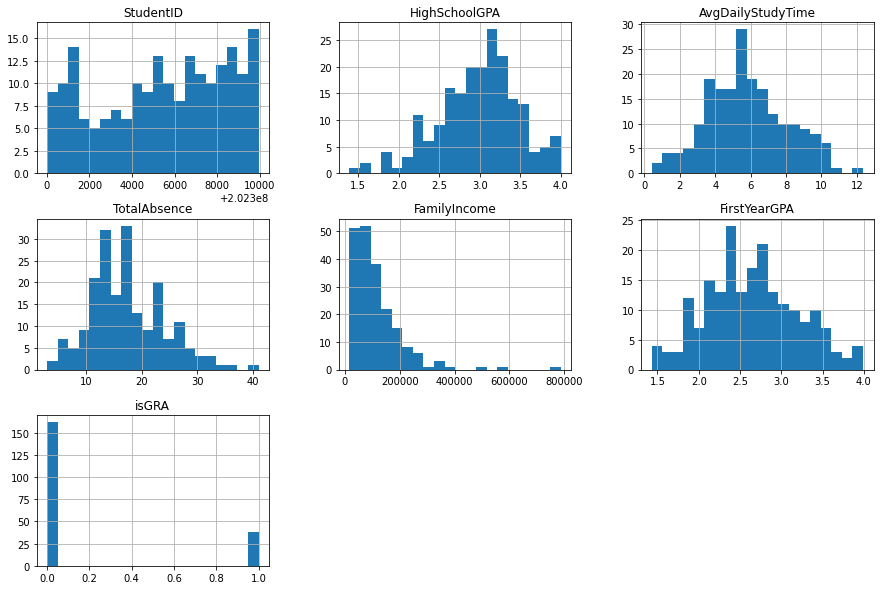

In [24]:
students.hist(bins=20, figsize=(15,10))
plt.show()

When using histograms, we typically look for two issues
1. Whether the bars look balanced or skewed. We generally prefer balanced histograms. However, somewhat skewed distributions are okay. Heavily skewed distributions like FamilyIncome may cause problem and should be fixed (in the next module)
2. Whether there are extreme values in data, or **outliers**. These are very short bars that are far from where most the data is. In this example, we can see some outliers in FamilyIncome

<h4>Frequency Tables and Bar Charts</h4>

Historgrams are only for numeric columns. For class columns, we use frequency tables to check how many rows are in each class of a column. We create frequency tables by calling value_counts() from the sliced columns

In [25]:
students[['Major']].value_counts()

Major                 
Data Science              51
Software Engineering      51
Computer Science          50
Information Technology    48
dtype: int64

We can add .plot.bar() after value_counts() to visualize the table as a bar chart. The rot= argument rotate the labels in the x-axis by the given degree so that they do not overlap each other

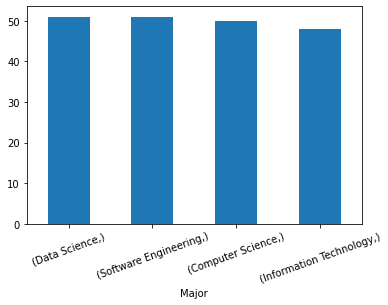

In [26]:
students[['Major']].value_counts().plot.bar(rot=20)
plt.show()

Somewhat similar to histograms, we verify if the columns have "rare" values since they may cause issues later on. The Major column is okay, but the State columns have some rare classes, specifically, NY and WA

In [27]:
students[['State']].value_counts()

State
GA       106
TN        37
AL        23
FL        22
NY         6
WA         6
dtype: int64

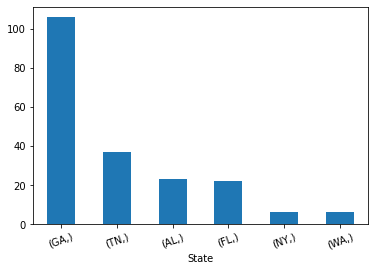

In [28]:
students[['State']].value_counts().plot.bar(rot=20)
plt.show()

<h4>Scatter Plots</h4>

Histograms and bar charts only allow us to examining a single column's distribution. We can further investigate the columns' **associations** with each other.

For two numeric columns, we use scatter plots. A scatter plot has two axes
- The vertical axis usually represents the range of the target
- The horizontal axis usually represents the range of the feature
- Each point in the plot represents one data instance. The coordinations of the point are its true values of target and feature

We use pyplot.scatter() to draw scatter plots. It needs two inputs which are the two columns of interest. The first input forms the horizontal axis and the second input vertical axis

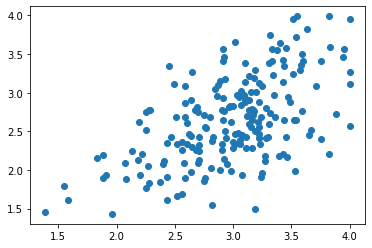

In [29]:
plt.scatter(students['HighSchoolGPA'],students['FirstYearGPA'])
plt.show()

The pattern of the points in the scatter plot illustrates how strongly/weakly the feature and target correlate to each other
- A very defined pattern with a clear trend indicate strong correlation - we can get more accurate models if the correlations between features and target are strong
    - If the pattern seems like a straight line, the correlation is linear
    - If the pattern follows a curve, the correlation is non-linear
- A less defined pattern (the points spread more vertically) means weaker correlations - we will get less accurate models
- If the points spread all over the plot without any patterns, there are no correlations - models' performances will be very poor

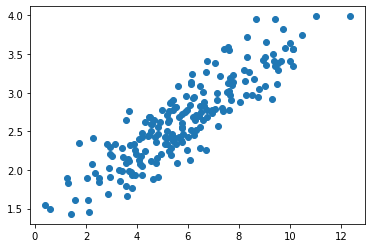

In [30]:
plt.scatter(students['AvgDailyStudyTime'],students['FirstYearGPA'])
plt.show()

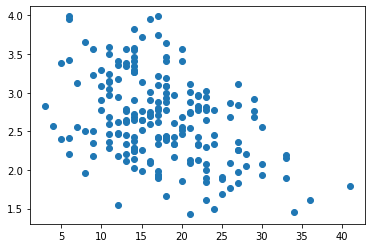

In [31]:
plt.scatter(students['TotalAbsence'],students['FirstYearGPA'])
plt.show()

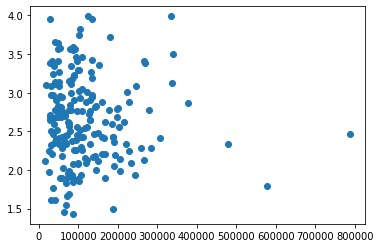

In [32]:
plt.scatter(students['FamilyIncome'],students['FirstYearGPA'])
plt.show()

<h4>Box Plots</h4>

Box plots are similar to histograms in that they show the distributions of single numeric columns. In a box plot, the rectangle represents where the middle 50% of the values in the column, the two bars represent where most of the values are, and the dots represents outliers.

We use boxplot() from a sliced column to draw boxplots.

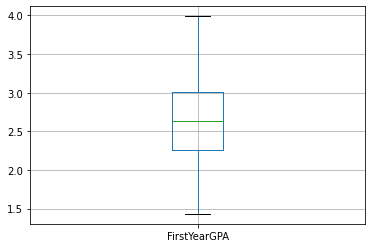

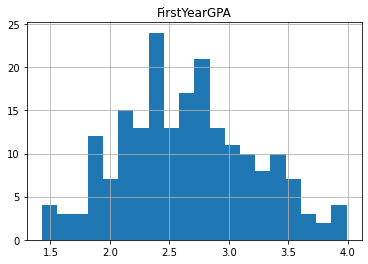

In [33]:
students[['FirstYearGPA']].boxplot()
plt.show()
students[['FirstYearGPA']].hist(bins=20)
plt.show()

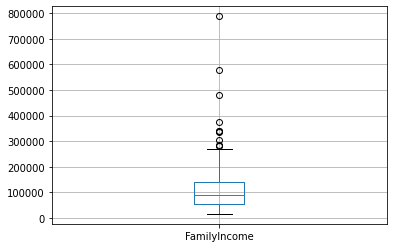

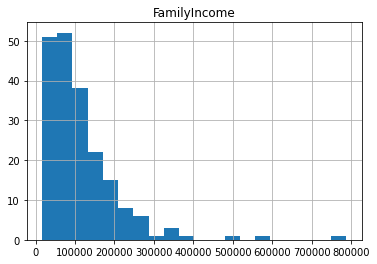

In [34]:
students[['FamilyIncome']].boxplot()
plt.show()
students[['FamilyIncome']].hist(bins=20)
plt.show()

An advantage of box plots over histograms is that we can draw side-by-side box plots to compare distributions of a numeric column stratified by a class column. This is one way to check the association of a class column to a numeric column. If there are no differences across the box plots, there are no associations. If there are strong differences, the correlation between the two columns are strong.

- While histograms of different classes can be overlaid on top others, too many histograms is much more difficult to read compared to side-by-side box plots.

To draw side-by-side box plots, we slice the two columns of interests, then call boxplot() with by= added. The stratifying column should be provided for the by= argument.

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


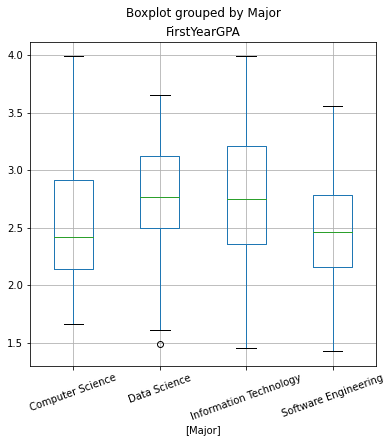

In [35]:
students[['Major','FirstYearGPA']].boxplot(by='Major', rot=20, figsize=(6,6))
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


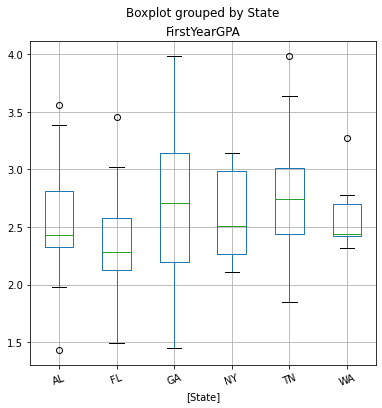

In [36]:
students[['State','FirstYearGPA']].boxplot(by='State', rot=20, figsize=(6,6))
plt.show()

<h4>Association with Binary Targets</h4>

In the case that the target is class and binary, we can use scatter plots to check its associations with other numeric columns. We still look for patterns similar to in regular scatter plots

In this case, the target is isGRA, so we add it as the 2nd input to scatter()

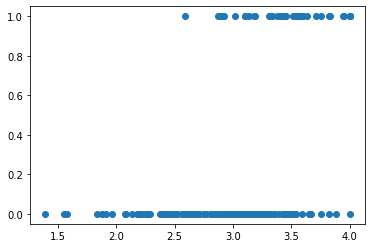

In [37]:
plt.scatter(students['HighSchoolGPA'],students['isGRA'])
plt.show()

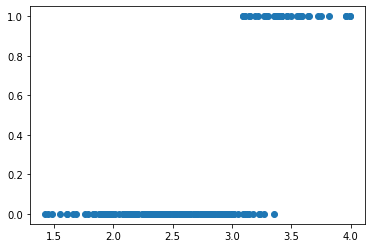

In [38]:
plt.scatter(students['FirstYearGPA'],students['isGRA'])
plt.show()

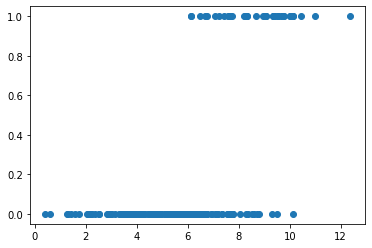

In [39]:
plt.scatter(students['AvgDailyStudyTime'],students['isGRA'])
plt.show()

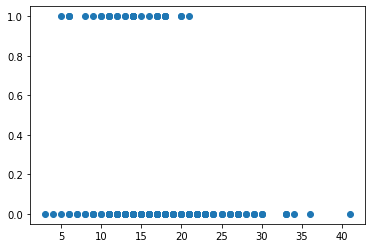

In [40]:
plt.scatter(students['TotalAbsence'],students['isGRA'])
plt.show()

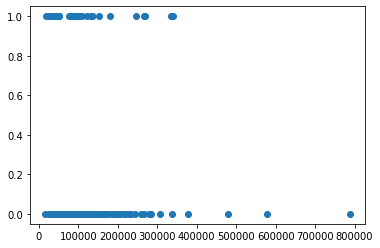

In [41]:
plt.scatter(students['FamilyIncome'],students['isGRA'])
plt.show()

<h4>Stacked Bar Chart</h4>

Finally, to examine the association of two class columns, we can use stacked bar charts. Similar to side-by-side box plots, we verify if there are significant differences among the categories. If there are differences, there are associations, otherwise, the two columns are not correlated.

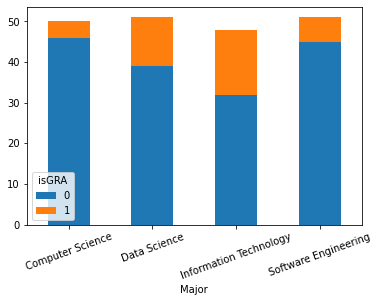

In [42]:
pd.crosstab(students['Major'],students['isGRA']).plot.bar(rot=20,stacked='True')

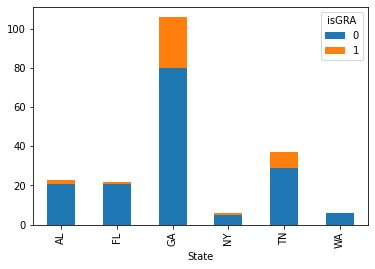

In [43]:
pd.crosstab(students['State'],students['isGRA']).plot.bar(stacked='True')
plt.show()